In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Visual Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Loading Dataset
df = pd.read_csv("Original_Dataset/dataset.csv")
print("The Dataset has been Loaded Successfully")
print("\nDataset Shape:", df.shape)
df.head()

The Dataset has been Loaded Successfully

Dataset Shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Checking for Null values
print("\nNull Values:\n", df.isnull().sum())

# Adding a fancy price range for visualizations
price_map = {
    0: "Low (<10k)",
    1: "Medium (10k-30k)",
    2: "High (30k-60k)",
    3: "Very High (>60k)"
}
df['Price_Range_Label'] = df['price_range'].map(price_map)


Null Values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
# Saving Clean Dataset
try:
    df.to_csv('Clean_Mobile_Data.csv', index=False)
    print("Clean Data has been saved successfully.")
except PermissionError:
    print("Clean Data file is currently open or locked. Skipping saving.")

Clean Data file is currently open or locked. Skipping saving.


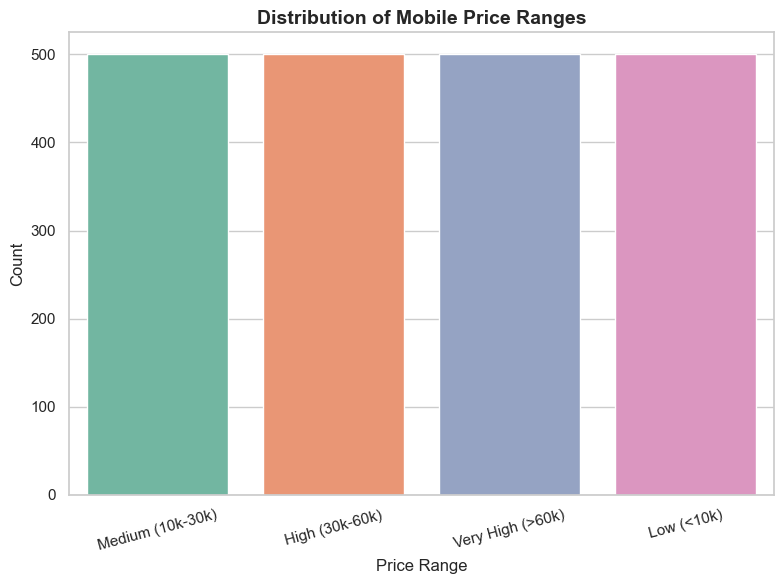

In [20]:
# Univariate Analysis
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  # Adjust figure size
ax = sns.countplot(
    x='Price_Range_Label',
    hue='Price_Range_Label',  # assign hue to avoid future warning
    data=df,
    palette="Set2",
    legend=False  # prevent duplicate legend
)

# Titles and labels
plt.title("Distribution of Mobile Price Ranges", fontsize=14, fontweight='bold')
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)  # Slight rotation for clarity
plt.tight_layout()  # Adjust spacing
plt.show()

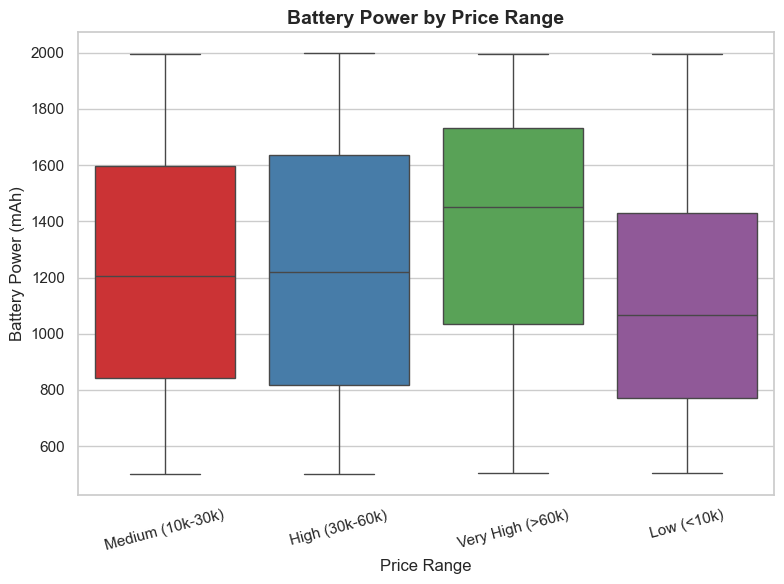

In [22]:
# Battery Power vs Price Range
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  # Adjust figure size
ax = sns.boxplot(
    x='Price_Range_Label',
    y='battery_power',
    hue='Price_Range_Label',  # assign hue to avoid future warning
    data=df,
    palette="Set1",
    legend=False  # avoid duplicate legend
)

# Titles and labels
plt.title("Battery Power by Price Range", fontsize=14, fontweight='bold')
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Battery Power (mAh)", fontsize=12)
plt.xticks(rotation=15)  # Rotate labels for clarity
plt.tight_layout()  # Adjust layout
plt.show()

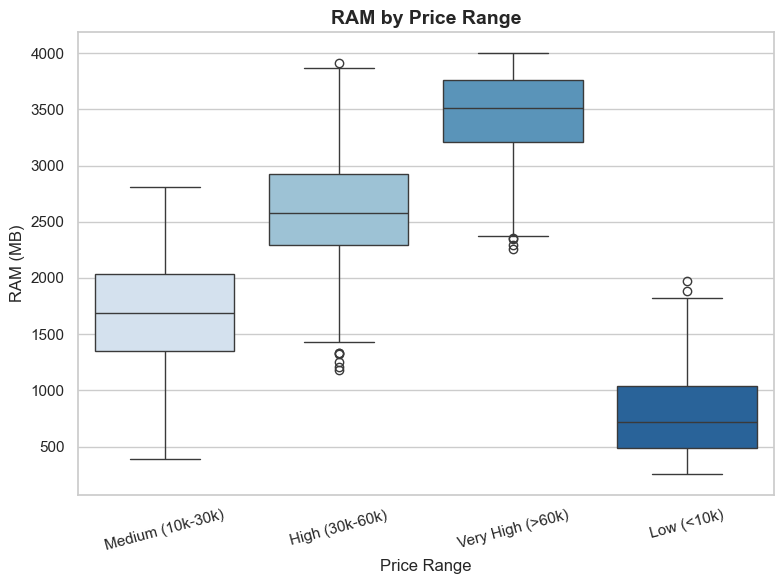

In [23]:
# RAM vs Price Range
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6)) 
ax = sns.boxplot(
    x='Price_Range_Label',
    y='ram',
    hue='Price_Range_Label', 
    data=df,
    palette="Blues", 
    legend=False 
)

# Titles and labels
plt.title("RAM by Price Range", fontsize=14, fontweight='bold')
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("RAM (MB)", fontsize=12)
plt.xticks(rotation=15)  # Rotate labels for clarity
plt.tight_layout() 
plt.show()

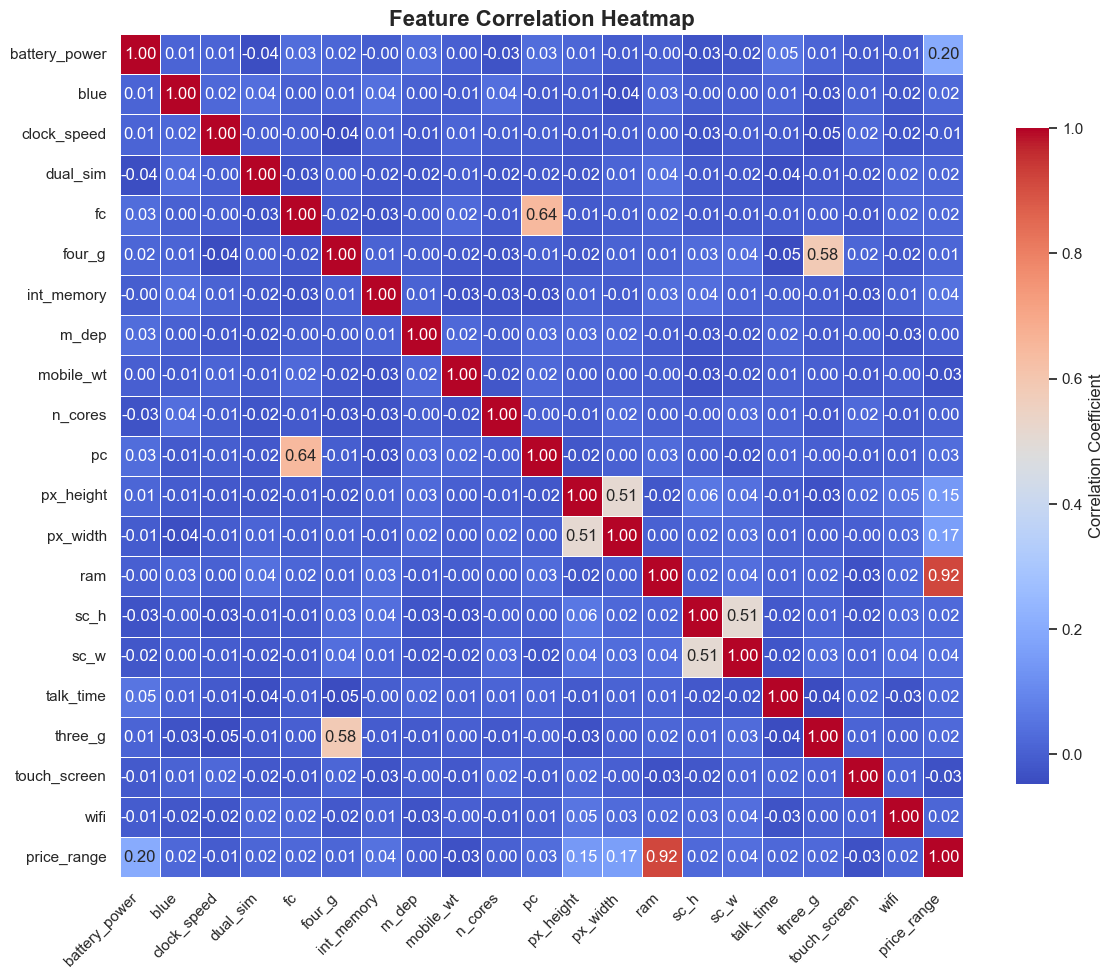

In [25]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))

# Create correlation matrix 
corr_matrix = df.drop('Price_Range_Label', axis=1).corr()

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,      
    fmt='.2f',       
    cmap='coolwarm', 
    linewidths=0.5,   
    linecolor='white', 
    square=True,    
    cbar_kws={'shrink': 0.75, 'label': 'Correlation Coefficient'} 
)

# Title and layout
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)            
plt.tight_layout()
plt.show()

In [26]:
# Feature Importance
X = df.drop(['price_range', 'Price_Range_Label'], axis=1)
y = df['price_range']
print("The Columns has been dropped Successfully!")

The Columns has been dropped Successfully!


In [27]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

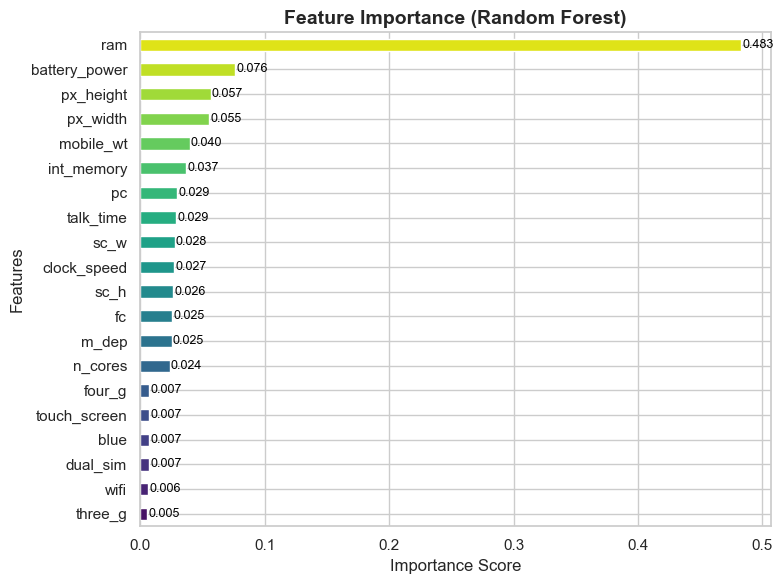

In [28]:
# Random Forest for feature importance
rf = RandomForestClassifier()
rf.fit(X_scaled, y)

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
ax = importances_sorted.plot(
    kind='barh',
    color=sns.color_palette("viridis", len(importances_sorted)) 
)

# Add value labels
for i, v in enumerate(importances_sorted):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=9)

# Styling
plt.title("Feature Importance (Random Forest)", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
#Spliting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("The Split of Data Has be done successfully!")

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("The Fitting is done")

The Split of Data Has be done successfully!
The Fitting is done


In [30]:
# Evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.86      0.86        91
           2       0.79      0.86      0.82        92
           3       0.95      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


Confusion Matrix:
 [[101   4   0   0]
 [  6  78   7   0]
 [  0   8  79   5]
 [  0   0  14  98]]


In [31]:
# Save model
import joblib
joblib.dump(model, 'mobile_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model saved as 'mobile_price_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")

✅ Model saved as 'mobile_price_model.pkl'
✅ Scaler saved as 'scaler.pkl'


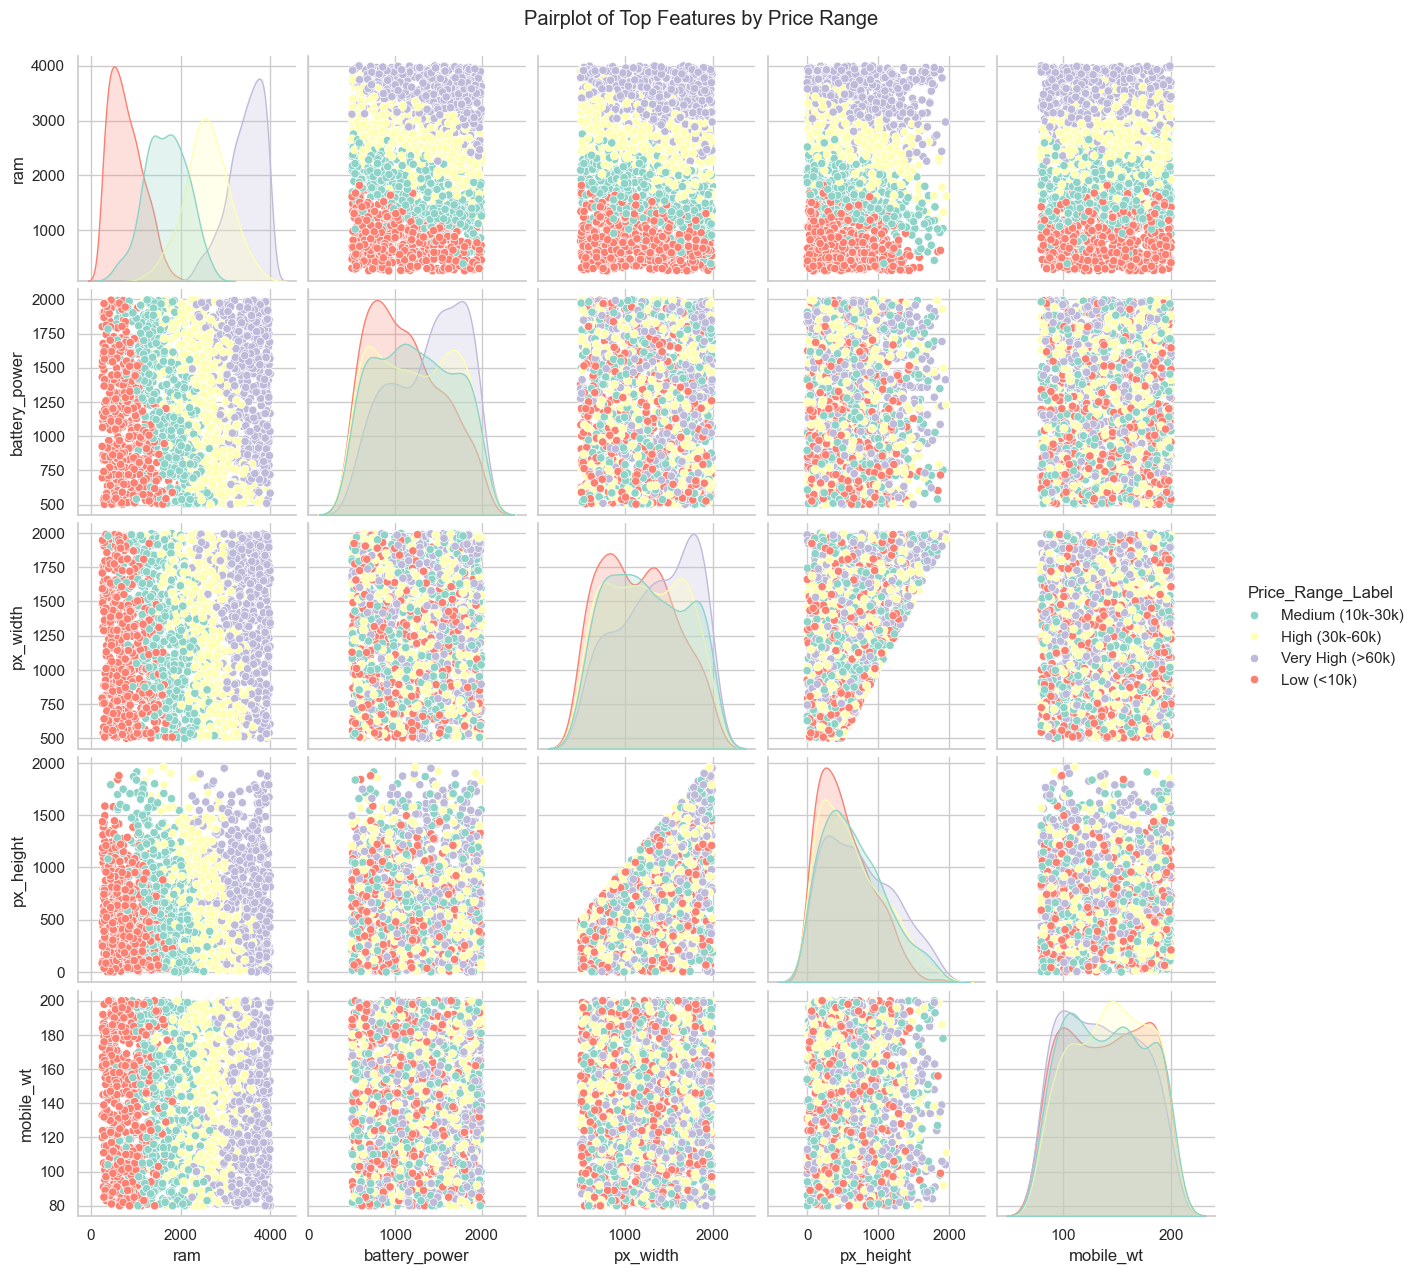

In [37]:
# Top 5 Important Features
rf_temp = RandomForestClassifier()
rf_temp.fit(X_scaled, y)
feature_importances = pd.Series(rf_temp.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(5).index.tolist()

sns.pairplot(df[top_features + ['Price_Range_Label']], hue='Price_Range_Label', palette='Set3')
plt.suptitle("Pairplot of Top Features by Price Range", y=1.02)
plt.show()

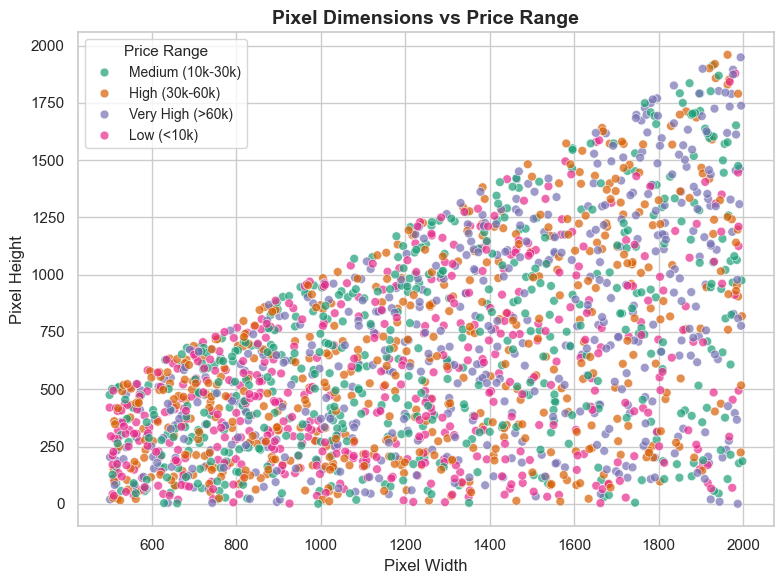

In [41]:
# Scatterplot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    x='px_width',
    y='px_height',
    hue='Price_Range_Label',       
    data=df,
    palette='Dark2',              
    s=40,                   
    alpha=0.7 
)

# Titles and labels
plt.title("Pixel Dimensions vs Price Range", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Width", fontsize=12)
plt.ylabel("Pixel Height", fontsize=12)

# Styling
plt.legend(title="Price Range", fontsize=10, title_fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()

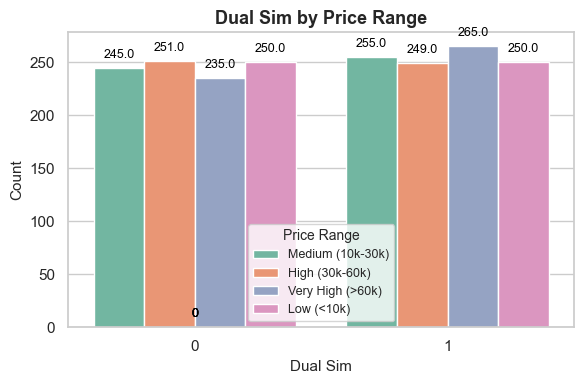

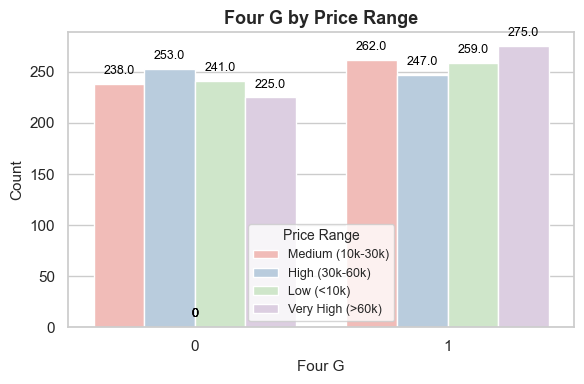

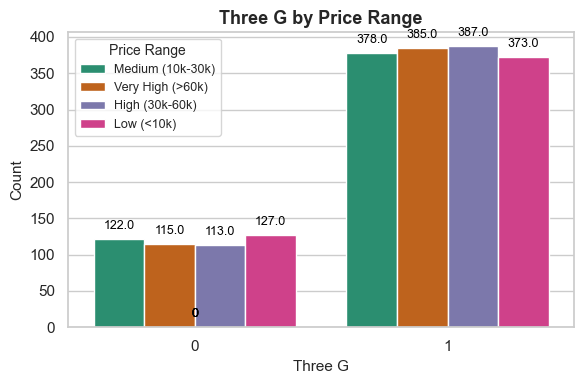

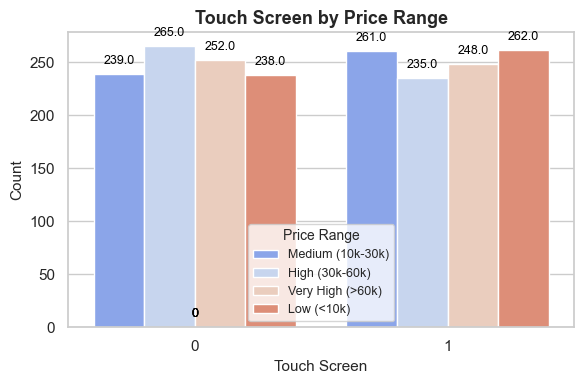

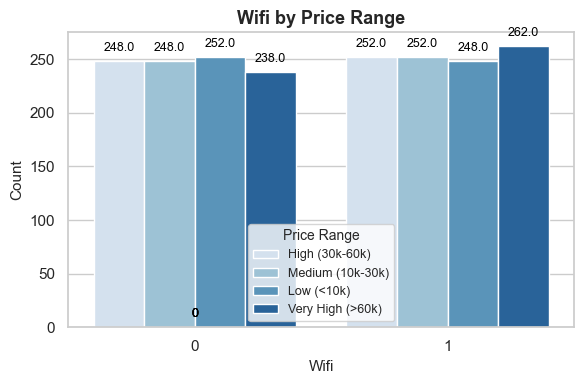

In [43]:
# Define binary features and a list of palettes for variety
binary_features = ['dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
palette_list = ['Set2', 'Pastel1', 'Dark2', 'coolwarm', 'Blues']

for i, feature in enumerate(binary_features):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x=feature,
        hue='Price_Range_Label',
        data=df,
        palette=palette_list[i % len(palette_list)],
        dodge=True
    )
    
    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom',
                    fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.title(f"{feature.replace('_', ' ').title()} by Price Range", fontsize=13, fontweight='bold')
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.legend(title="Price Range", fontsize=9, title_fontsize=10)
    plt.tight_layout()
    plt.show()

In [44]:
# Library
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.8725 0.8725 0.8975 0.875  0.86  ]
Mean CV Accuracy: 87.55%


In [45]:
# Random Samples for Test set
sample_indices = np.random.choice(X_test.shape[0], 5, replace=False)
sample_data = X_test[sample_indices]
sample_true = y_test.iloc[sample_indices]
sample_preds = model.predict(sample_data)
sample_probs = model.predict_proba(sample_data)

# Display predictions
for i in range(5):
    print(f"Sample {i+1}:")
    print("True Label:", price_map[sample_true.iloc[i]])
    print("Predicted Label:", price_map[sample_preds[i]])
    print("Class Probabilities:", sample_probs[i])
    print("-")

print("The Test Samples has been successfully executed!")

Sample 1:
True Label: Medium (10k-30k)
Predicted Label: Low (<10k)
Class Probabilities: [0.43 0.41 0.1  0.06]
-
Sample 2:
True Label: Low (<10k)
Predicted Label: Low (<10k)
Class Probabilities: [0.78 0.17 0.04 0.01]
-
Sample 3:
True Label: High (30k-60k)
Predicted Label: High (30k-60k)
Class Probabilities: [0.05 0.11 0.71 0.13]
-
Sample 4:
True Label: Very High (>60k)
Predicted Label: Very High (>60k)
Class Probabilities: [0.01 0.06 0.11 0.82]
-
Sample 5:
True Label: High (30k-60k)
Predicted Label: Medium (10k-30k)
Class Probabilities: [0.14 0.42 0.33 0.11]
-
The Test Samples has been successfully executed!


In [46]:
# Libraries
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Unique values per column
print("\nUnique Values per Column:")
print(df.nunique())

# Dataset Information
df.info()
print("The information and Values has been extracted")


Unique Values per Column:
battery_power        1094
blue                    2
clock_speed            26
dual_sim                2
fc                     20
four_g                  2
int_memory             63
m_dep                  10
mobile_wt             121
n_cores                 8
pc                     21
px_height            1137
px_width             1109
ram                  1562
sc_h                   15
sc_w                   19
talk_time              19
three_g                 2
touch_screen            2
wifi                    2
price_range             4
Price_Range_Label       4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   battery_power      2000 non-null   int64  
 1   blue               2000 non-null   int64  
 2   clock_speed        2000 non-null   float64
 3   dual_sim           2000 non-null   i

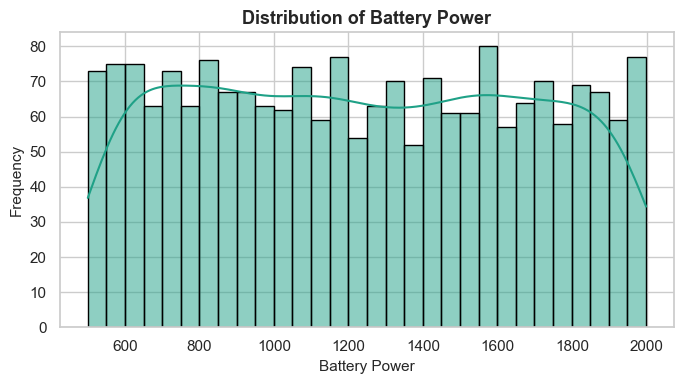

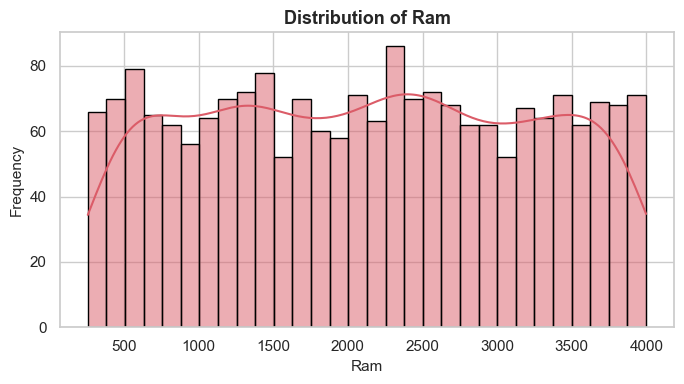

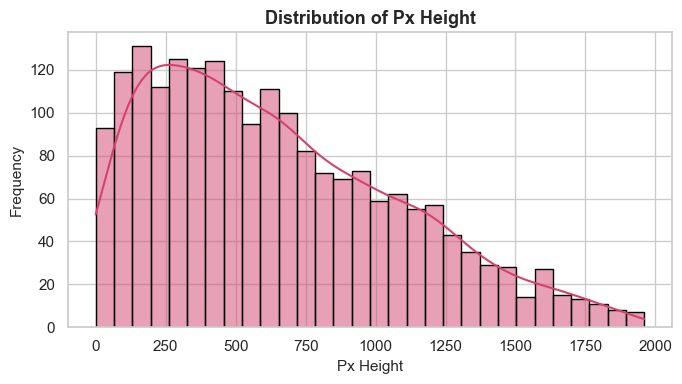

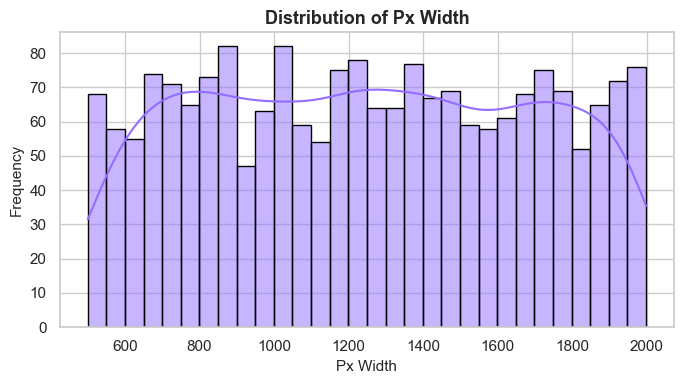

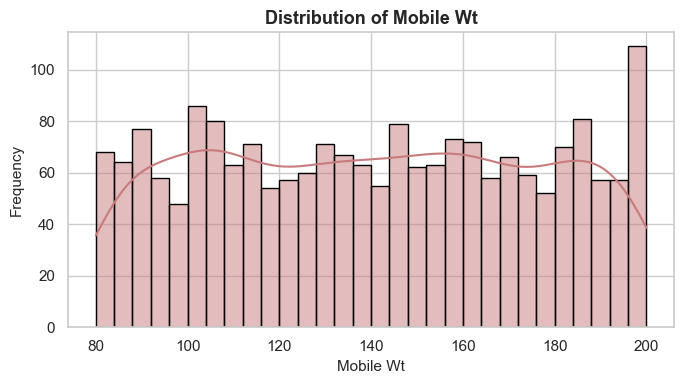

In [49]:
# Continuous Feature Distribution
continuous_features = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt']
palette_list = ['viridis', 'plasma', 'magma', 'cool', 'cubehelix']

for i, feature in enumerate(continuous_features):
    plt.figure(figsize=(7, 4))
    sns.histplot(
        df[feature], 
        kde=True, 
        bins=30,
        color=sns.color_palette(palette_list[i % len(palette_list)])[3],
        edgecolor="black"
    )
    
    # Titles and labels
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}", fontsize=13, fontweight='bold')
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.show()


Top 10 Important Features:
ram              0.494163
battery_power    0.074602
px_width         0.057448
px_height        0.055640
mobile_wt        0.038960
int_memory       0.034699
talk_time        0.030347
sc_w             0.027892
pc               0.027459
sc_h             0.026547
dtype: float64


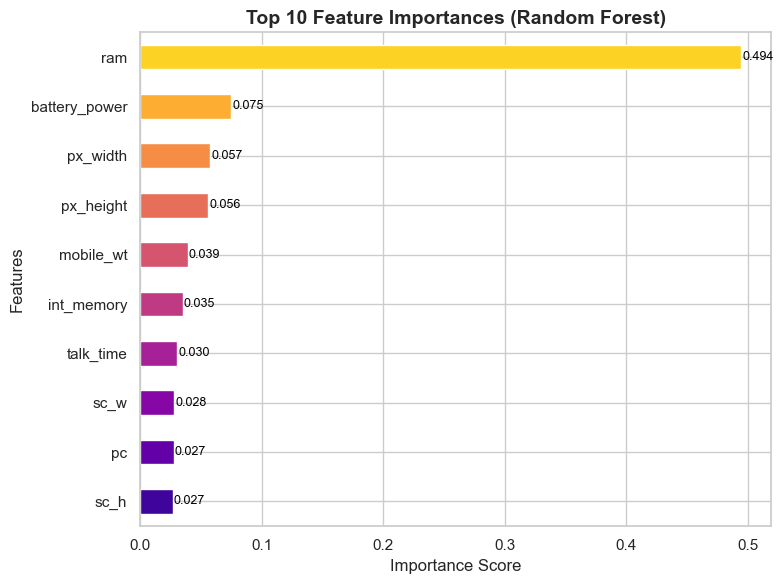

In [51]:
# Random Forest Feature Importance
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_scaled, y)

# Get feature importances
importances = pd.Series(rf_temp.feature_importances_, index=X.columns)

# Print Top 10 Features
print("\nTop 10 Important Features:")
print(importances.sort_values(ascending=False).head(10))

# Plot Top 10 Features
top_importances = importances.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 6))
ax = top_importances.plot(
    kind='barh',
    color=sns.color_palette("plasma", len(top_importances))
)

# Add value labels to bars
for i, v in enumerate(top_importances):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=9)

# Styling
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

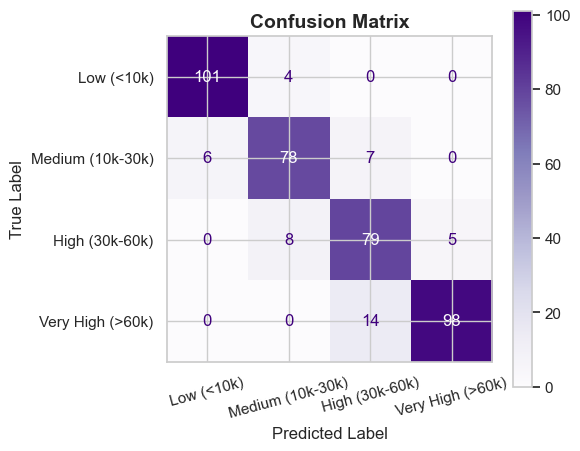

In [53]:
# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=list(price_map.values()))
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(
    cmap='Purples',
    ax=ax,
    colorbar=True,
    values_format='d' 
)

# Styling
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

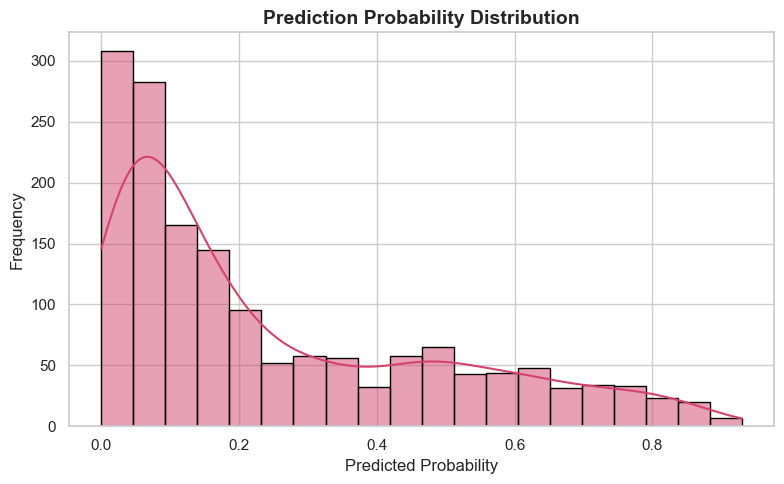

In [55]:
# Prediction Probability Distribution Graph
y_prob = model.predict_proba(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(
    y_prob.flatten(), 
    bins=20, 
    kde=True, 
    color=sns.color_palette("magma")[3],
    edgecolor="black"
)

# Styling
plt.title("Prediction Probability Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

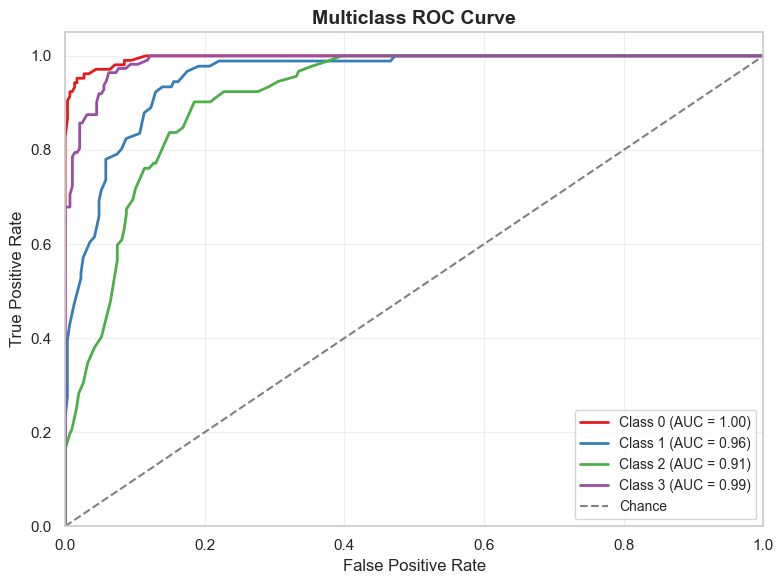

In [57]:
# Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Train classifier
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train, label_binarize(y_train, classes=[0, 1, 2, 3]))
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set1", n_classes) 

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i],
        color=color,
        lw=2, 
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='grey', lw=1.5, linestyle='--', label='Chance')

# Styling
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Multiclass ROC Curve", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# Cross-Validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.8525 0.8675 0.8875 0.895  0.8525]
Mean CV Accuracy: 87.10%


In [59]:
# Sample Predictions
sample_indices = np.random.choice(X_test.shape[0], 5, replace=False)
sample_data = X_test[sample_indices]
sample_true = y_test.iloc[sample_indices]
sample_preds = model.predict(sample_data)
sample_probs = model.predict_proba(sample_data)

for i in range(5):
    print(f"Sample {i+1}:")
    print("True Label:", price_map[sample_true.iloc[i]])
    print("Predicted Label:", price_map[sample_preds[i]])
    print("Class Probabilities:", sample_probs[i])
    print("-")

Sample 1:
True Label: Very High (>60k)
Predicted Label: Very High (>60k)
Class Probabilities: [0.01 0.12 0.3  0.57]
-
Sample 2:
True Label: Low (<10k)
Predicted Label: Low (<10k)
Class Probabilities: [0.78 0.12 0.06 0.04]
-
Sample 3:
True Label: Very High (>60k)
Predicted Label: Very High (>60k)
Class Probabilities: [0.02 0.06 0.14 0.78]
-
Sample 4:
True Label: Very High (>60k)
Predicted Label: Very High (>60k)
Class Probabilities: [0.   0.07 0.08 0.85]
-
Sample 5:
True Label: Medium (10k-30k)
Predicted Label: Medium (10k-30k)
Class Probabilities: [0.28 0.6  0.06 0.06]
-


In [61]:
# Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [62]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

print("🔄 Running GridSearchCV for Random Forest...")
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_scaled, y)

print("\n✅ Best Random Forest Params:", grid_search_rf.best_params_)
print("✅ Best Random Forest CV Score: {:.2f}%".format(grid_search_rf.best_score_ * 100))

🔄 Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Random Forest Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best Random Forest CV Score: 89.00%


In [63]:
# Save optimized Random Forest model
try:
    best_rf_model = grid_search_rf.best_estimator_
    joblib.dump(best_rf_model, 'best_rf_model.pkl')
    print("✅ Optimized Random Forest model saved as 'best_rf_model.pkl'")
except PermissionError:
    print("Optimized Random Forest model is currently open or locked. Skipping saving.")

✅ Optimized Random Forest model saved as 'best_rf_model.pkl'


In [66]:
# XGBoost and Lightbgm Comparison
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)
print("\n📈 XGBoost Test Accuracy: {:.2f}%".format(xgb_score * 100))

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
print("📈 LightGBM Test Accuracy: {:.2f}%".format(lgbm_score * 100))

C:\Users\karme\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📈 XGBoost Test Accuracy: 90.50%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
📈 LightGBM Test Accuracy: 90.25%


C:\Users\karme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [67]:
# Model Selection
if grid_search_rf.best_score_ >= max(xgb_score, lgbm_score):
    final_model = best_rf_model
    print("\n✅ Random Forest selected as final model.")
else:
    final_model = xgb if xgb_score > lgbm_score else lgbm
    print("\n✅", type(final_model).__name__, "selected as final model.")

# Save final model
joblib.dump(final_model, 'final_mobile_price_model.pkl')
print("✅ Final model saved as 'final_mobile_price_model.pkl'")


✅ XGBClassifier selected as final model.
✅ Final model saved as 'final_mobile_price_model.pkl'
